In [1]:
from utils import *
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import re

config = load_config()
PROJECT_PATH = config.project_path
DATA_PATH = PROJECT_PATH.joinpath("data/processed")
MODEL_PATH = config.model_path("llama3.2-1B")
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)

/home/wjang/miniconda3/envs/cn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# evaluate train
dataset = pd.read_pickle(DATA_PATH.joinpath("evaluation_results_train.pkl"))

def extract_content_criteria(output) :
    result = []
    for out in output :
        criteria = re.findall(r"c\d", out)
        if len(criteria) > 0 :
            result.extend(criteria)
        else : 
            pass
    return result



In [3]:
criteria_list = []
for data in dataset :
    criteria_list.append(extract_content_criteria(data))

In [4]:
df = pd.DataFrame([{"c1" : 0, "c2" : 0, "c3" : 0, "c4" : 0, "c5" : 0, "c6" : 0}], index=["count"])
df

,c1,c2,c3,c4,c5,c6
count,0,0,0,0,0,0


In [5]:
for criteria in criteria_list :
    for c in criteria :
        df.loc["count", c] += 1

In [9]:
information = {"c1" : "Return to the ED/Hospital indications",
               "c2" : "Medication",
               "c3" : "Diagnosis",
               "c4" : "Postdischarge treatment",
               "c5" : "Tests and Treatments",
               "c6" : "Follow-up"}

In [6]:
df.loc['count',:]

c1     4575
c2    29165
c3    33499
c4     8375
c5    17962
c6    68674
Name: count, dtype: int64

In [7]:
df

,c1,c2,c3,c4,c5,c6
count,4575,29165,33499,8375,17962,68674


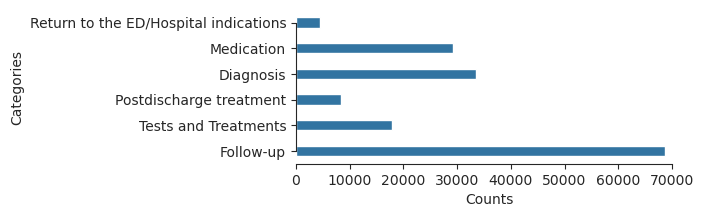

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams['text.usetex'] = False
# plt.rcParams['font.family'] = 'sans'
# matplotlib.use('TkAgg')
sns.set_style('ticks')
plt.figure(figsize = (5,2))
# plt.barplot([f'c{d}' for d in range(1,7)],df.loc['count'], color='c')
sns.barplot(y=information.values(), x=df.loc['count',], width=0.4, orient='h')
sns.despine(offset=0, trim=True)
plt.xlabel("Counts")
plt.ylabel("Categories")
# plt.legend()
# plt.savefig("../figures/criteria_train.jpg", dpi=300)
plt.show()

In [13]:
# load dataset
from datasets import load_dataset, concatenate_datasets

def load_datasets() :

    data = load_dataset("json", data_files={"train" : DATA_PATH.joinpath("train_conversation.jsonl").as_posix(),
                                    "test" : DATA_PATH.joinpath("test_conversation.jsonl").as_posix()})
    return data

In [3]:
ds = load_datasets()

In [ ]:
ds['train']['messages'][0]

In [18]:
# parse train/test to one dataset
merged_dataset = concatenate_datasets([ds["train"], ds["test"]])

In [ ]:
# analyze train/test to dataset 




In [ ]:
# define function that parse discharge note

def parse_discharge_notes(content) :
    content = content.replace("You are a helpful assistant trained for healthcare. Here is the patient\'s discharge note. \n\n", "")
    return content 

s = ds['train']['messages'][0][0]['content']
parse_discharge_notes(s)

'  \nName:  ___                       Unit No:   ___\n \nAdmission Date:  ___              Discharge Date:   ___\n \nDate of Birth:  ___             Sex:   F\n \nService: MEDICINE\n \nAllergies: \nACE Inhibitors / Lescol / simvastatin\n \nAttending: ___.\n \nChief Complaint:\nNeutropenic fever\n \nMajor Surgical or Invasive Procedure:\nNone\n \nHistory of Present Illness:\nMs. ___ is a pleasant ___ w/ HTN, DL, NSTEMI, L parietal \nmeningioma, and polycythemia ___ transformed to AML s/p MUD RIC \nallo HSCT ___ w/ relapse, now on decitabine, who p/w fevers \nand muscle aches, tmax 100.4 after receiving dacogen and \nplatelets yesterday. SHe has no localizing sx. \n\nIn ED fever improved, tmax 99.4F. Remaining VS unremarkable. \nReceived vanc/cef and admitted. On arrival to ___, pt noted she \nfelt significantly improved and back to her baseline. \n\nREVIEW OF SYSTEMS: 12 point ROS reviewed in detail and negative \nexcept for what is\nmentioned above in HPI\n \nPast Medical History:\n-Pol

How many datasets were used

In [40]:
# load train and test

ds = load_datasets()

In [41]:
ds

DatasetDict({
    train: Dataset({
        features: ['messages'],
        num_rows: 14231
    })
    test: Dataset({
        features: ['messages'],
        num_rows: 3558
    })
})

Calculate Turns

In [42]:
# define function

def calculate_turns(conversation) :

    turn = 0
    for conv in conversation['messages'] :
        if conv['role'] == 'system' :
            pass
        else :
            turn += 1
    return turn


s = ds['train'][0]

In [43]:
# train
turn_counts_train = []
for t in ds['train'] :
    count = calculate_turns(t)
    turn_counts_train.append(count)

turn_counts_test = []
for t in ds['test'] :
    count = calculate_turns(t)
    turn_counts_test.append(count)

In [44]:

np.array(turn_counts_test).max()

25

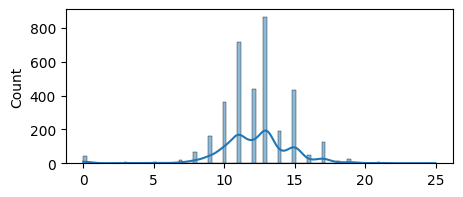

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,2))
sns.histplot(turn_counts_test,kde=True)
plt.savefig('../figures/turn_dist_test.jpg', dpi=300)
plt.show()

In [14]:
# case study

import pandas as pd
import numpy as np
from utils import *

config = load_config()
PROJECT_PATH = config.project_path
DATA_PATH = PROJECT_PATH.joinpath("data/processed")
dataset = pd.read_pickle(DATA_PATH.joinpath("evaluation_case_gpt4o_train.pkl"))

In [15]:
# load dataset
df = load_datasets()

In [27]:
dataset[2]['text'][2]

dataset[3]['outputs']

[' c6\n\n',
 ' c6,c',
 ' c3 \n\n',
 ' c6\n\n',
 ' c4,c',
 ' c6\n\n',
 ' c6\n\n',
 ' c3 \n\n',
 ' c4\n\n',
 ' c3\n\n',
 ' c2,c',
 ' c3\n\n',
 ' c4,c',
 '6\n\n###',
 ' c6\n\n']

In [17]:
def reformat_for_case_study(messages) :
    text = ""
    for message in messages :
        if message['role'] == "system" :
            continue
        text += message['role'] + " : " + message['content'] + "\n"
    return text



In [28]:
sample = df['train']['messages'][2]

In [29]:
print(reformat_for_case_study(sample))

assistant : Hi, how can I help you today?
user : I have some questions about my discharge instructions regarding my surgery and recovery.
assistant : Sure, I can help with that. You were admitted because of acute cholecystitis, which means your gallbladder was inflamed and had obstructive stones. They performed a procedure called ERCP to remove those stones and sludge, and then they removed your gallbladder with a laparoscopic surgery. [Evidence: "You were admitted to the hospital with acute cholecystitis with obstructive gallstones... you were then taken to the operating room and had your gallbladder removed laparoscopically."]
user : I see. What should I be careful about with my activities?
assistant : You'll need to avoid driving until you're off pain medication and feel alert enough to handle an emergency situation. You can climb stairs and go outside, but don't travel long distances until you've seen your surgeon again. Also, avoid lifting anything heavier than a small bag of groc